# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [12]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from math import floor

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
  r = requests.get(url + fileName, allow_redirects=True)
  open(fileName, 'wb').write(r.content)
from ainvert import A_invert


fileNames = ["parrot.bmp", "clock.bmp", "chessboard.bmp"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

def calculate(I, x, y):
  Y, X = I.shape
  d = I[y, x]
  dx = (I[y, min(X-1, x+1)] - I[y, max(0, x-1)]) / 2
  dy = (I[min(Y-1, y+1), x] - I[max(0, y-1), x]) / 2
  dxy = (I[min(Y-1, y+1), min(X-1, x+1)] - I[max(0, y-1), x] - I[y, max(0, x-1)] + I[y, x]) / 4
  return d, dx, dy, dxy

def bicubic(I, kY, kX):
  I = np.float64(I)
  Y, X = I.shape
  Ynew, Xnew = round(kY * Y), round(kX * X)
  Inew = np.zeros((Ynew, Xnew), dtype = np.float64)

  for y in range(Ynew):
    for x in range(Xnew):
      y1 = floor(y/kY)
      y2 = min(Y - 1, y1 + 1)
      x1 = floor(x/kX)
      x2 = min(X - 1, x1 + 1)

      y_ = y/kY - y1
      x_ = x/kX - x1

      A, Ax, Ay, Axy = calculate(I, x1, y1)
      B, Bx, By, Bxy = calculate(I, x2, y1)
      C, Cx, Cy, Cxy = calculate(I, x2, y2)
      D, Dx, Dy, Dxy = calculate(I, x1, y2)

      X_ = np.transpose(np.array([A, B, D, C, Ax, Bx, Dx, Cx, Ay, By, Dy, Cy, Axy, Bxy, Dxy, Cxy]))
      a = np.matmul(A_invert, X_)

      for index, a_ in enumerate(a):
        Inew[y, x] += a_ * x_**(index % 4) * y_**(index // 4)

  return Inew

def bilinear(I, kY, kX):
  I = np.float64(I)
  Y, X = I.shape
  Xnew, Ynew = round(kX * X), round(kY * Y)
  Inew = np.zeros((Ynew, Xnew), dtype=np.float64)

  for y in range(Ynew):
    for x in range(Xnew):
      y1 = int(y/kY)
      y2 = min(Y - 1, y1 + 1)
      x1 = int(x/kX)
      x2 = min(X - 1, x1 + 1)

      fA = I[y1][x1]
      fB = I[y1][x2]
      fC = I[y2][x2]
      fD = I[y2][x1]

      y_ = y/kY - y1
      x_ = x/kX - x1

      Inew[y][x] = fA * (1 - x_) * (1 - y_) + fB * x_ * (1 - y_) + fC * x_ * y_ + fD * (1 - x_) * y_

  return Inew

def compare(I, ky, kx, scale=100):
  Y, X = I.shape
  fig, axs = plt.subplots(1, 2)
  fig.set_size_inches(2 * X*kx / scale, Y*ky / scale)
  fig.set_dpi(200)

  for ax in axs:
    ax.axis("off")

  axs[0].imshow(bilinear(I, ky, kx), "gray")
  axs[0].set_title("bilinear")
  axs[1].imshow(bicubic(I, ky, kx), "gray")
  axs[1].set_title("bicubic")

def show(I, scale=100):
  Y, X = I.shape
  plt.figure(figsize=(X/scale, Y/scale), dpi=200)
  plt.imshow(I, cmap ="gray")
  plt.xticks([]), plt.yticks([])
  plt.title("original")
  plt.show()

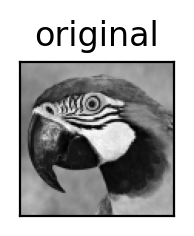

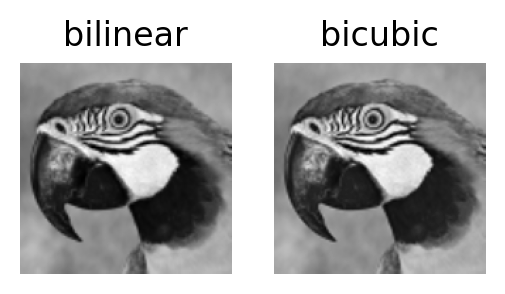

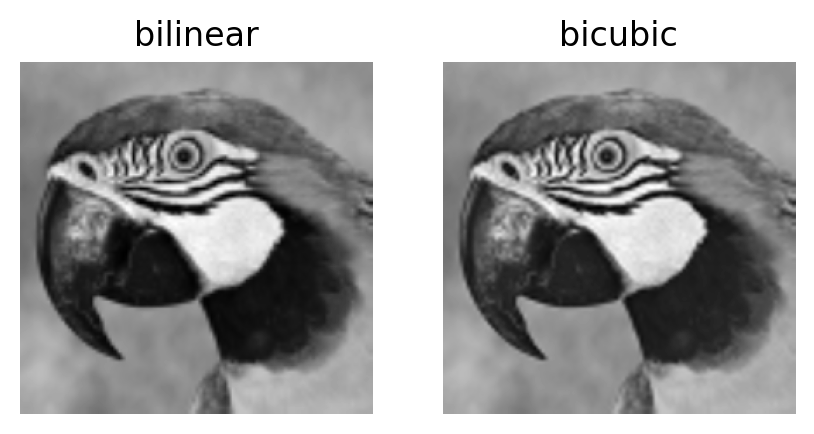

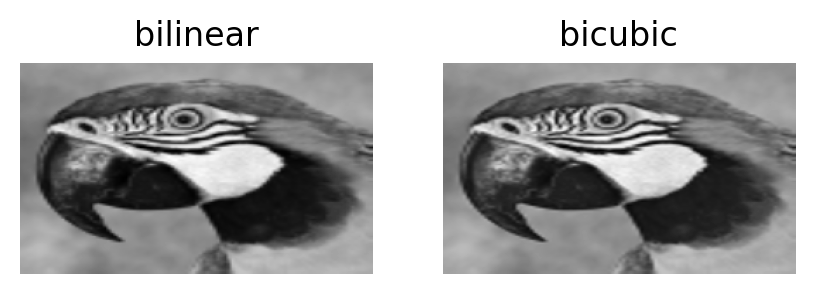

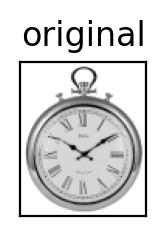

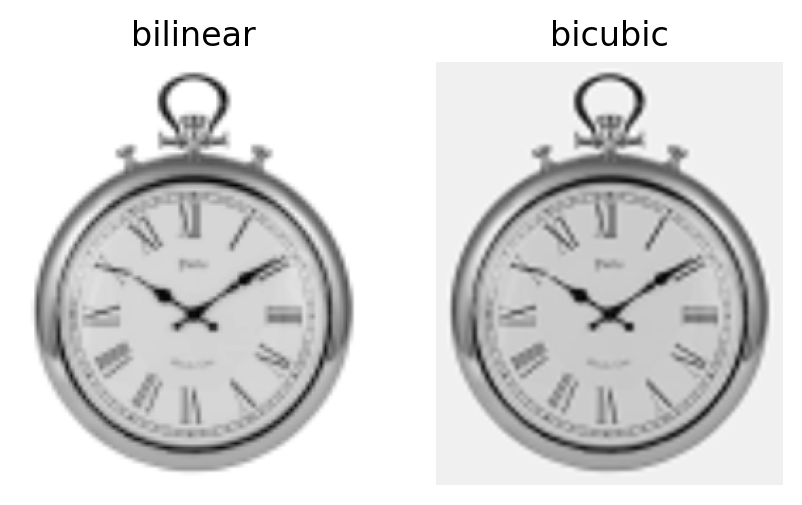

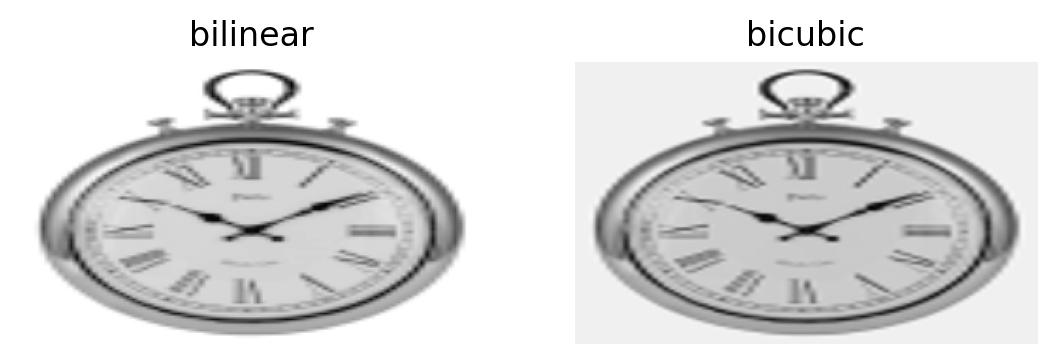

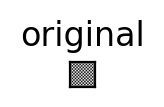

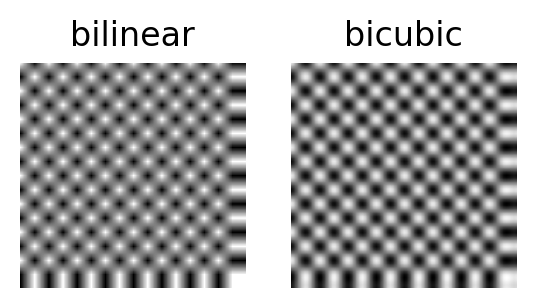

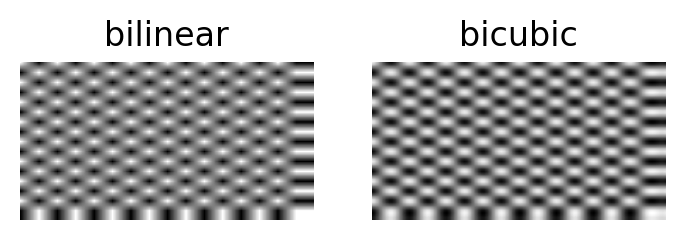

In [13]:
I = cv2.imread("parrot.bmp", cv2.IMREAD_GRAYSCALE)
I_clock = cv2.imread("clock.bmp", cv2.IMREAD_GRAYSCALE)
I_chess = cv2.imread("chessboard.bmp", cv2.IMREAD_GRAYSCALE)

show(I)
compare(I, 1.5, 1.5)
compare(I, 2.5, 2.5)
compare(I, 1.5, 2.5)

show(I_clock)
compare(I_clock, 3, 3)
compare(I_clock, 2, 4)

show(I_chess)
compare(I_chess, 10, 10)
compare(I_chess, 7, 13)